GRUPO: 
Caio Basso
Pedro Miczewski
Rafael Lopes
Vitor Emmanuel

Nesta primeira etapa do trabalho realizamos os imports necessários e também o load do dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow
from glob import glob

import cv2, math
from google.colab.patches import cv2_imshow

from tensorflow.keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics, preprocessing
import skimage.feature as feature

import itertools    

import re 

In [ ]:
K=5
max_iter = 5000

models = {}
models['KNN'] = KNeighborsClassifier(n_neighbors=K)
models['NB'] = MultinomialNB()
models['LR'] = LogisticRegression(max_iter=max_iter)
models['DT'] = DecisionTreeClassifier(max_depth=5)
models['SVC'] = SVC(max_iter=max_iter)
models['MLP'] = MLPClassifier(max_iter=max_iter)

In [ ]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list,titles,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)
  
  for i in range(n):  
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()

## LOAD DATASET

In [ ]:
!wget https://github.com/rafz1/TDE_Simpsons/blob/main/Teste.zip?raw=true -O TestDataset.zip

--2022-10-13 22:37:54--  https://github.com/rafz1/TDE_Simpsons/blob/main/Teste.zip?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rafz1/TDE_Simpsons/raw/main/Teste.zip [following]
--2022-10-13 22:37:55--  https://github.com/rafz1/TDE_Simpsons/raw/main/Teste.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rafz1/TDE_Simpsons/main/Teste.zip [following]
--2022-10-13 22:37:55--  https://raw.githubusercontent.com/rafz1/TDE_Simpsons/main/Teste.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2130194 (2.0M) 

In [ ]:
!wget https://github.com/rafz1/TDE_Simpsons/blob/main/Treino.zip?raw=true -O TrainDataset.zip

--2022-10-13 22:37:57--  https://github.com/rafz1/TDE_Simpsons/blob/main/Treino.zip?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rafz1/TDE_Simpsons/raw/main/Treino.zip [following]
--2022-10-13 22:37:57--  https://github.com/rafz1/TDE_Simpsons/raw/main/Treino.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rafz1/TDE_Simpsons/main/Treino.zip [following]
--2022-10-13 22:37:58--  https://raw.githubusercontent.com/rafz1/TDE_Simpsons/main/Treino.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3658984 (3

In [ ]:
!mkdir /content/test/
!mkdir /content/train/

In [ ]:
!unzip -o TestDataset.zip -d '/content/test/'

Archive:  TestDataset.zip
  inflating: /content/test/bart081.bmp  
  inflating: /content/test/bart082.bmp  
  inflating: /content/test/bart083.bmp  
  inflating: /content/test/bart084.bmp  
  inflating: /content/test/bart085.bmp  
  inflating: /content/test/bart086.bmp  
  inflating: /content/test/bart087.bmp  
  inflating: /content/test/bart088.bmp  
  inflating: /content/test/bart089.bmp  
  inflating: /content/test/bart090.bmp  
  inflating: /content/test/bart091.bmp  
  inflating: /content/test/bart092.bmp  
  inflating: /content/test/bart093.bmp  
  inflating: /content/test/bart094.bmp  
  inflating: /content/test/bart095.bmp  
  inflating: /content/test/bart096.bmp  
  inflating: /content/test/bart097.bmp  
  inflating: /content/test/bart098.bmp  
  inflating: /content/test/bart099.bmp  
  inflating: /content/test/bart100.bmp  
  inflating: /content/test/bart101.bmp  
  inflating: /content/test/bart102.bmp  
  inflating: /content/test/bart103.bmp  
  inflating: /content/test/bart

In [ ]:
!unzip -o TrainDataset.zip -d '/content/train/'

Archive:  TrainDataset.zip
  inflating: /content/train/bart001.bmp  
  inflating: /content/train/bart002.bmp  
  inflating: /content/train/bart003.bmp  
  inflating: /content/train/bart004.bmp  
  inflating: /content/train/bart005.bmp  
  inflating: /content/train/bart006.bmp  
  inflating: /content/train/bart007.bmp  
  inflating: /content/train/bart008.bmp  
  inflating: /content/train/bart009.bmp  
  inflating: /content/train/bart010.bmp  
  inflating: /content/train/bart011.bmp  
  inflating: /content/train/bart012.bmp  
  inflating: /content/train/bart013.bmp  
  inflating: /content/train/bart014.bmp  
  inflating: /content/train/bart015.bmp  
  inflating: /content/train/bart016.bmp  
  inflating: /content/train/bart017.bmp  
  inflating: /content/train/bart018.bmp  
  inflating: /content/train/bart019.bmp  
  inflating: /content/train/bart020.bmp  
  inflating: /content/train/bart021.bmp  
  inflating: /content/train/bart022.bmp  
  inflating: /content/train/bart023.bmp  
  infla

In [ ]:
dataset_train = glob(os.path.join('/content/train/', '*.bmp'))
dataset_test = glob(os.path.join('/content/test/', '*.bmp'))

#bart = glob(os.path.join('/content/train/', 'bart*'))

## Criação do dataset, buscamos através do nome das imagens para identificar a label pertencente, para então criar o dataset e "linkar" cada imagem com sua respectiva label através do dicionário de personagens. Como não são todas as imagens que são quadradas, o melhor resultado obtido foi realizando o resize das imagens para retangular, especificamente 126x256, esse valor não deixa a imagem com baixa qualidade, realizamos testes com imagens quadradas e com menor resolução, acaba perdendo totalmente a qualidade da imagem e os resultados obtidos são bem piores.

In [ ]:
dict_characters = {0: 'bart', 1: 'homer', 
        2: 'lisa', 3: 'marge', 4: 'maggie'}
def load_test_set(dirname,dict_characters):
    X_test = []
    Y_test = []
    for image_name in os.listdir(dirname):
        character_name = re.findall(r'\D+|\d+', image_name)[:-2][0]
        #character_name = "_".join(image_name.split('_')[:-1])
        label = [label for label,character in dict_characters.items() if character == character_name][0]
        image = cv2.imread(dirname+'/'+image_name)
        X_test.append(cv2.resize(image, (128, 256)))
        Y_test.append(label)
    return np.array(X_test), np.array(Y_test)

X_test, Y_test = load_test_set("/content/test/", dict_characters)

X_train, Y_train = load_test_set("/content/train/", dict_characters)

X_train_features, Y_train_features = X_train, Y_train

X_test_features, Y_test_features = X_test, Y_test

# NORMALIZANDO AS IMAGENS PARA FICAR ENTRE 0 E 1
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)
# FLAT IMAGE SHAPE
X_trainShape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_testShape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_trainFlat = X_train.reshape(X_train.shape[0], X_trainShape)
X_testFlat = X_test.reshape(X_test.shape[0], X_testShape)
# # Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
# Y_trainHot = to_categorical(Y_train, num_classes = 6)
# Y_testHot = to_categorical(Y_test, num_classes = 6)

Training Data Shape: (226, 256, 128, 3) (226, 256, 128, 3)
Testing Data Shape: (95, 256, 128, 3) (95, 256, 128, 3)


## DATA PROCESSING

In [ ]:
class HOG:
  def describe(self,im,pixels_per_cell=(4, 4),cells_per_block=(2, 2)):
    if len(im.shape) > 2 and im.shape[2] == 3:
      im = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

    im = cv2.resize(im,(128,256))

    fd, hog_image = feature.hog(im, orientations=9, pixels_per_cell=pixels_per_cell,
                	cells_per_block=(2, 2),visualize=True)
    return fd,hog_image

In [ ]:
class HuMoments:
  def describe(self,im,threshold=130):

    if len(im.shape) > 2 and im.shape[2] == 3:
      im = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
    

    _,threshold = cv2.threshold(im, threshold, 255, cv2.THRESH_BINARY)

    # Calculate Moments 
    moments = cv2.moments(threshold) 
    # Calculate Hu Moments 
    huMoments = cv2.HuMoments(moments)

    # Log scale hu moments 
    for i in range(0,len(huMoments)):
      if huMoments[i] != 0:        
        huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))

    #There is resulting image for HuMoments
    return huMoments.reshape(huMoments.shape[0]), threshold

In [ ]:
class GABOR:
    def __init__(self,ksize=31,n_filters=8):
        self.filters = []     
           
        for theta in np.arange(0, np.pi, np.pi / n_filters):
            kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            kern /= 1.5*kern.sum()
            self.filters.append(kern)
            
    def get_filters(self):
      return self.filters

    def describe(self,im):
        if len(im.shape) > 2 and im.shape[2] == 3:
          im = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

        gabor_img = np.zeros_like(im)
        for kern in self.filters:
            f_im = cv2.filter2D(im, cv2.CV_8UC3, kern)
            np.maximum(gabor_img, f_im, gabor_img)
        
        return gabor_img.reshape(-1), gabor_img

In [ ]:
class LAB:
  def describe(self,im):
    if len(im.shape) > 2 and im.shape[2] == 3:
      im = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)

    im = cv2.resize(im,(128,256))

    return im.reshape(-1), im

In [ ]:
class LBP:
  def __init__(self, numPoints, radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self,im,threshold=130, eps = 1e-7):

    if len(im.shape) > 2 and im.shape[2] == 3:
      im = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
    

    lbp = feature.local_binary_pattern(im, self.numPoints, self.radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints+3), range=(0, self.numPoints + 2))

    hist = hist.astype('float')
    hist /= (hist.sum() + eps)

    return hist, lbp

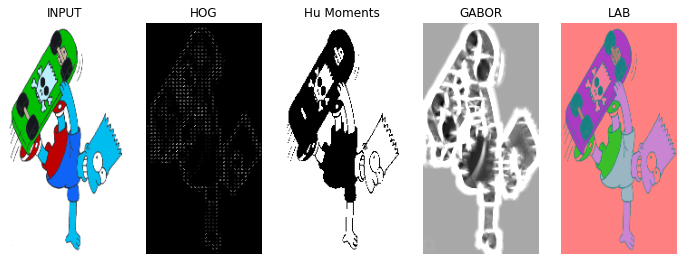

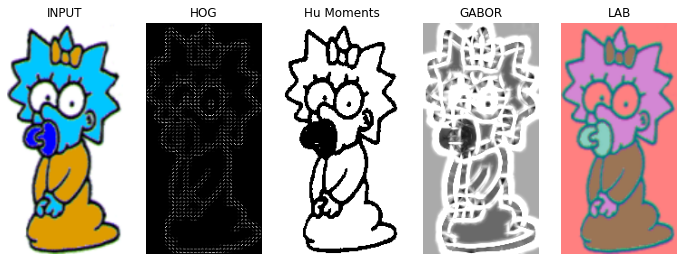

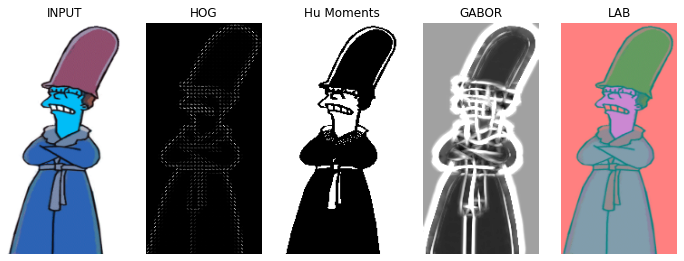

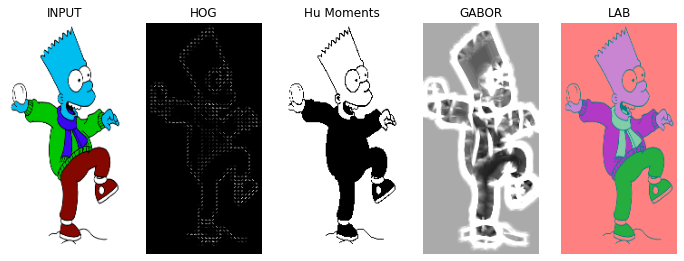

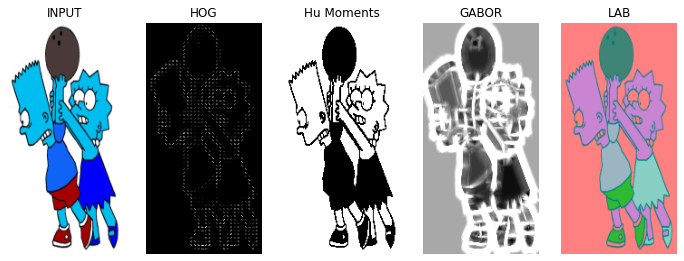

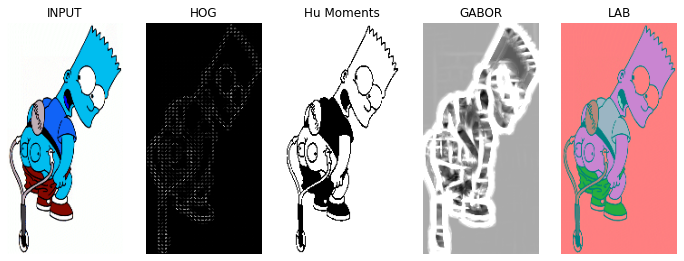

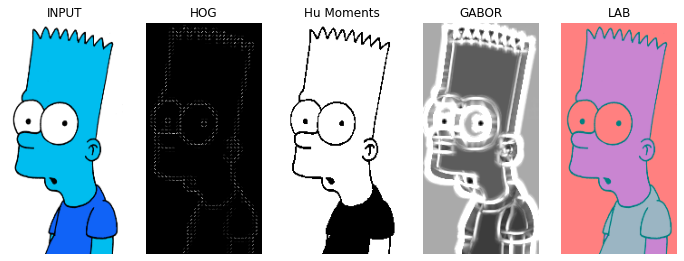

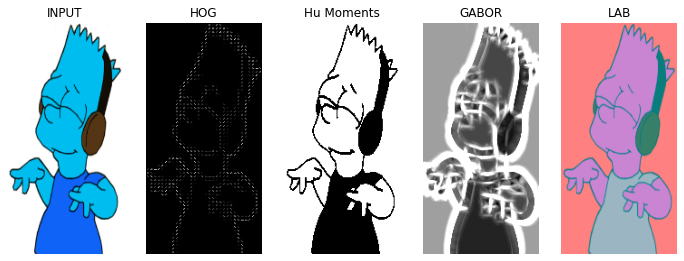

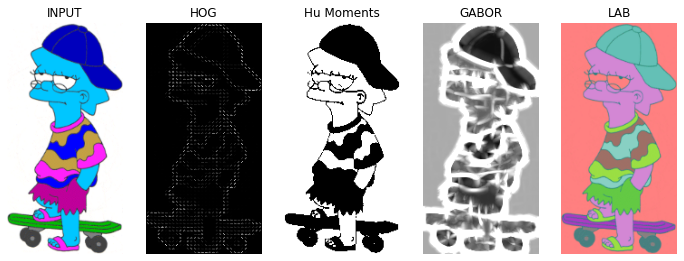

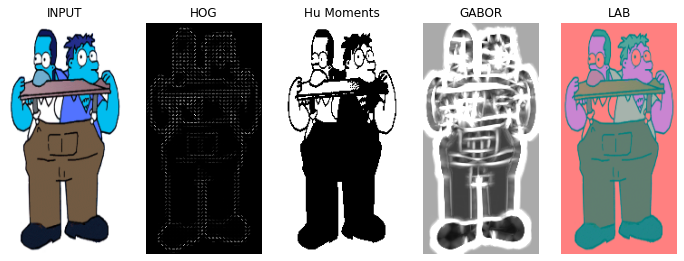

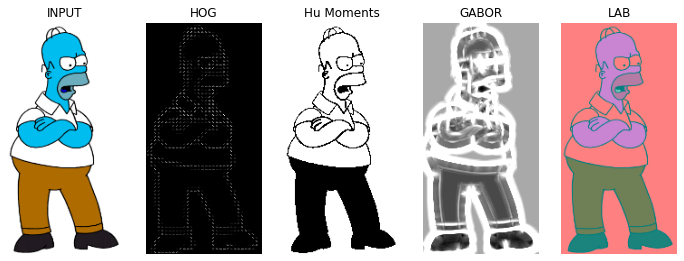

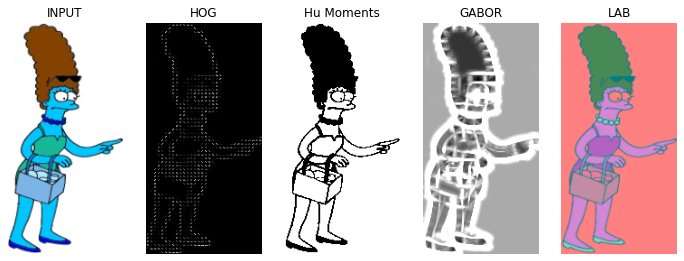

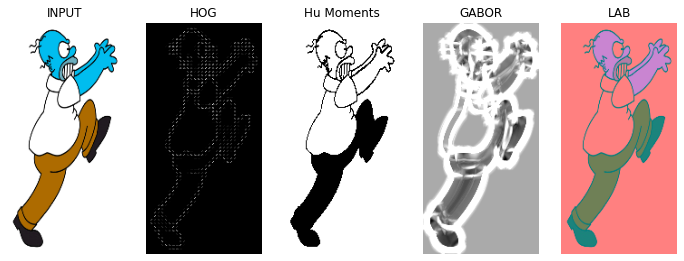

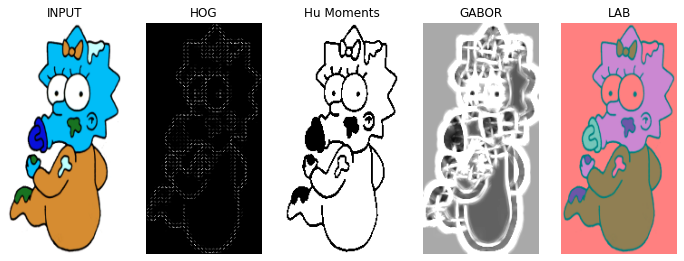

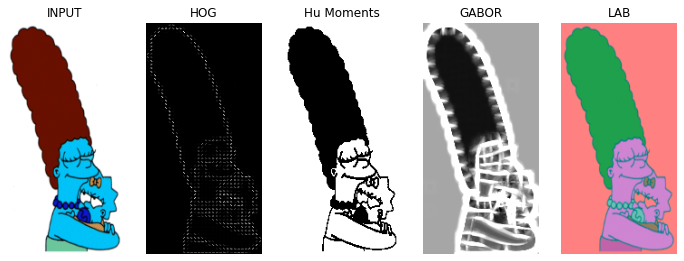

In [ ]:
descriptors = []
descriptors.append(HOG())
descriptors.append(HuMoments())
descriptors.append(GABOR(16,8))
descriptors.append(LAB())
descriptors.append(LBP(24,8))

desc_names_w_input = [ 'INPUT','HOG','Hu Moments', 'GABOR', 'LAB', 'LBP']

for img, lbl in zip(X_train_features[:15],Y_train_features[:15]):
  processed_imgs = [img]
  for desc in descriptors:
    feat, res_img = desc.describe(img)          
    processed_imgs.append(res_img)
  
  plot_sidebyside(processed_imgs,desc_names_w_input,colormap='gray')

In [ ]:
descriptors = []
descriptors.append(HOG())
descriptors.append(HuMoments())
descriptors.append(GABOR(16,8))
descriptors.append(LAB())
descriptors.append(LBP(24,8))

desc_names = [ 'HOG','Hu Moments', 'GABOR', 'LAB', 'LBP']

features_train = {}
features_test = {}

N_SAMPLES_TRAIN = 226
N_SAMPLES_TEST = 95

for desc,name in zip(descriptors,desc_names):  
  features = []
  for img, lbl in zip(X_train_features,Y_train_features):
    
    feat, _ = desc.describe(img)       
    features.append(feat)
    
  #Add to a dictionary
  features_train[name] = np.reshape(features,(N_SAMPLES_TRAIN,-1))
  print('Train Data: ',name, features_train[name].shape)
  
for desc,name in zip(descriptors,desc_names):  
  features = []
  for img, lbl in zip(X_test_features,Y_test_features):
    feat, _ = desc.describe(img)       
    features.append(feat)
  
  #Add to a dictionary
  features_test[name] = np.reshape(features,(N_SAMPLES_TEST,-1))
  print('Test Data: ',name, features_test[name].shape)

Train Data:  HOG (226, 70308)
Train Data:  Hu Moments (226, 7)
Train Data:  GABOR (226, 32768)
Train Data:  LAB (226, 98304)
Test Data:  HOG (95, 70308)
Test Data:  Hu Moments (95, 7)
Test Data:  GABOR (95, 32768)
Test Data:  LAB (95, 98304)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Compare Multiple Classifiers:

Accuracy:

LR: 0.602372 (0.083304)
LR 

KNN: 0.557510 (0.070143)
KNN 

SVM: 0.561462 (0.108059)
SVM 

DTC: 0.447431 (0.085371)
DTC 



<Figure size 432x288 with 0 Axes>

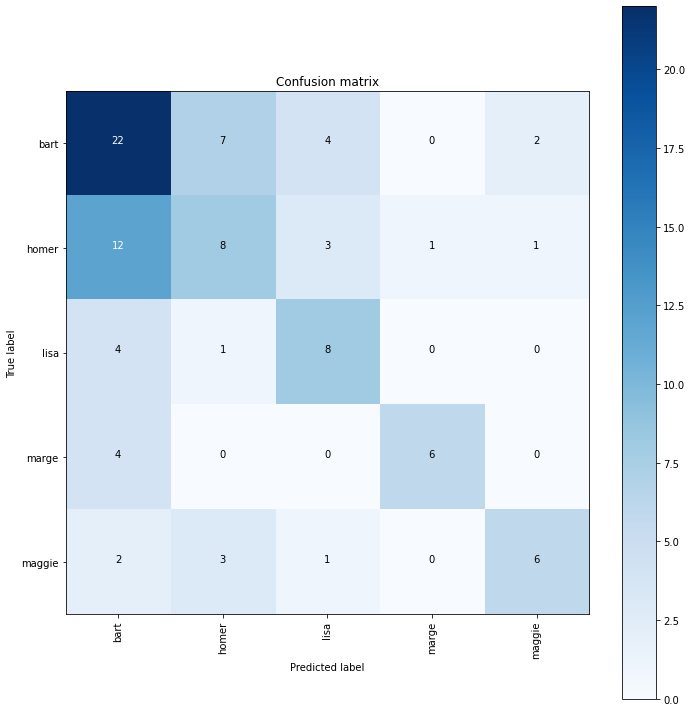

<Figure size 432x288 with 0 Axes>

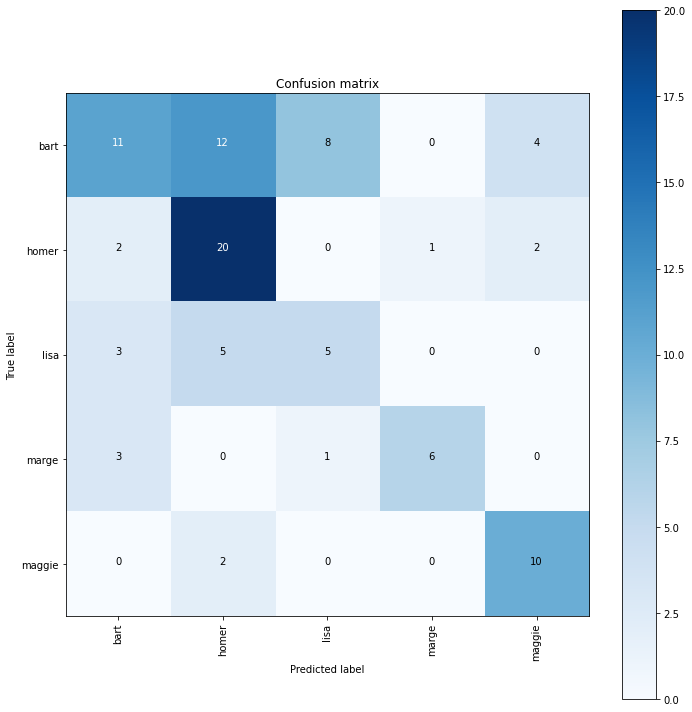

<Figure size 432x288 with 0 Axes>

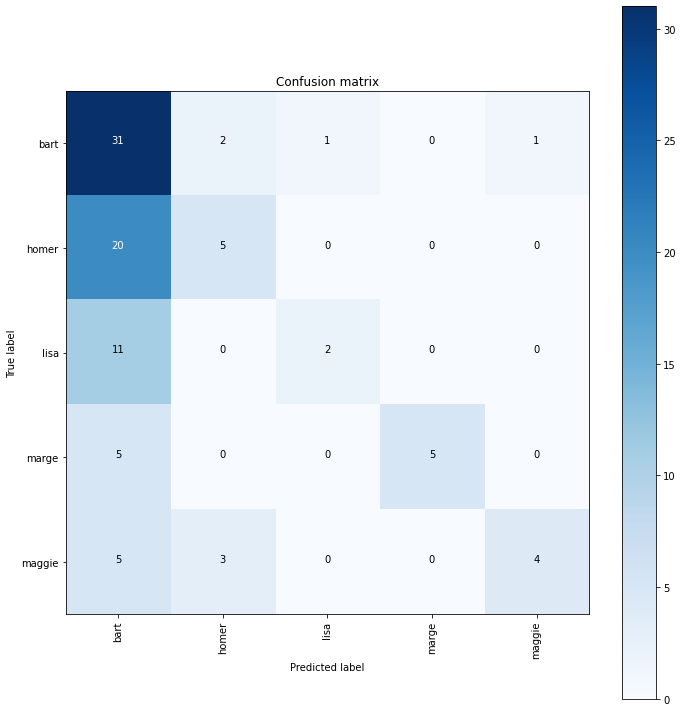

<Figure size 432x288 with 0 Axes>

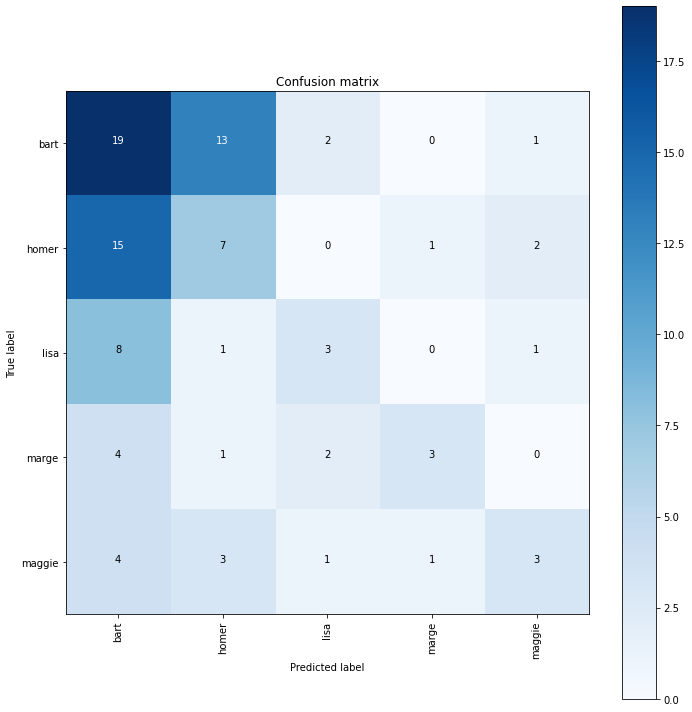

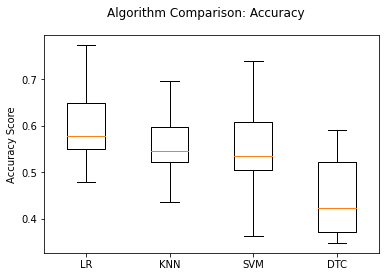


LR = LogisticRegression
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
DTC = DecisionTreeClassifier



In [ ]:
def compareABunchOfDifferentModelsAccuracy(a,b,c,d):

    print('\nCompare Multiple Classifiers:\n')
    print('Accuracy:\n')
    models = []
    models.append(('LR', LogisticRegression(max_iter=max_iter)))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=K)))
    models.append(('SVM', SVC(max_iter=max_iter)))
    models.append(('DTC', DecisionTreeClassifier()))   
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a, b)
        kfold = model_selection.KFold(n_splits=10)
        accuracy_results = model_selection.cross_val_score(model, a, b, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)  
        prediction = model.predict(c)
        cnf_matrix = confusion_matrix(d, prediction)
        np.set_printoptions(precision=2)
        class_names = dict_characters 
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=list(dict_characters.values()),title='Confusion matrix')
        print(name, '\n')
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Accuracy Score')
    plt.show()
    return

compareABunchOfDifferentModelsAccuracy(X_trainFlat, Y_train, X_testFlat, Y_test)

def defineModels():
    print('\nLR = LogisticRegression')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('DTC = DecisionTreeClassifier')
    print('')
defineModels()

Processing Full HOG
(226, 70308) (95, 70308)

Compare Multiple Classifiers:

Accuracy:

LR: 0.481621 (0.060792)
KNN: 0.415415 (0.119253)
SVM: 0.380435 (0.114140)
DTC: 0.278261 (0.066632)


<Figure size 432x288 with 0 Axes>

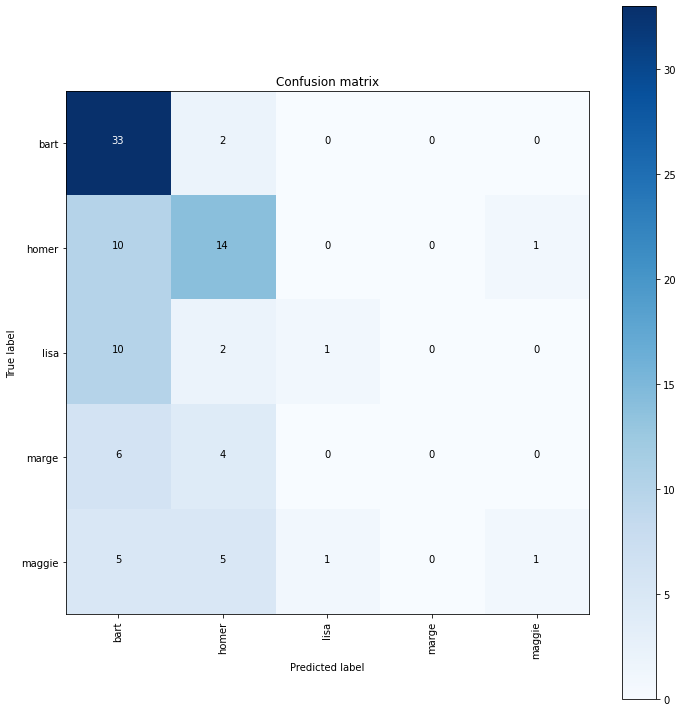

<Figure size 432x288 with 0 Axes>

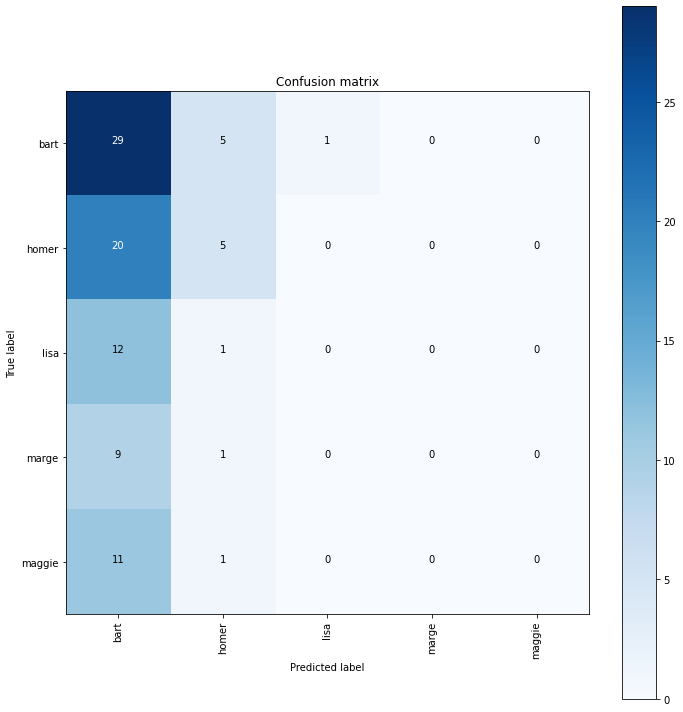

<Figure size 432x288 with 0 Axes>

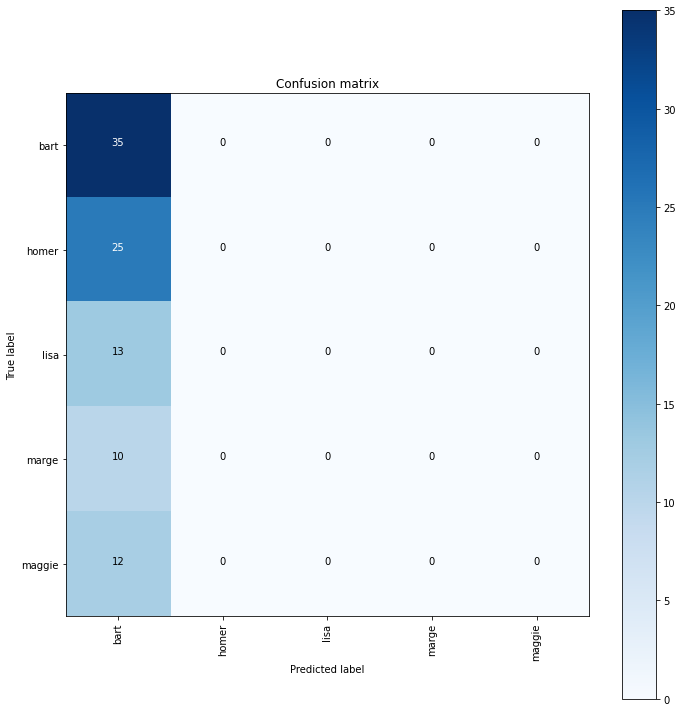

<Figure size 432x288 with 0 Axes>

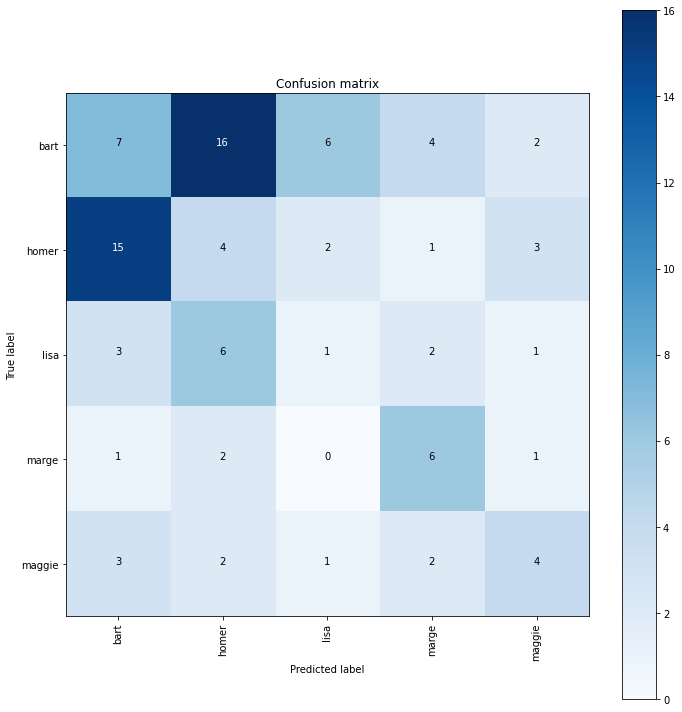

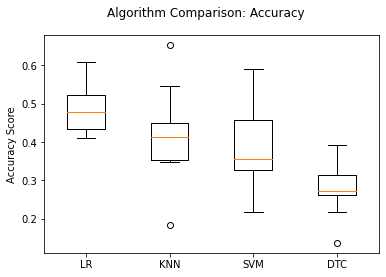

Processing Full Hu Moments
(226, 7) (95, 7)

Compare Multiple Classifiers:

Accuracy:

LR: 0.340909 (0.122403)
KNN: 0.308893 (0.085160)
SVM: 0.282411 (0.107068)
DTC: 0.277273 (0.096697)


<Figure size 432x288 with 0 Axes>

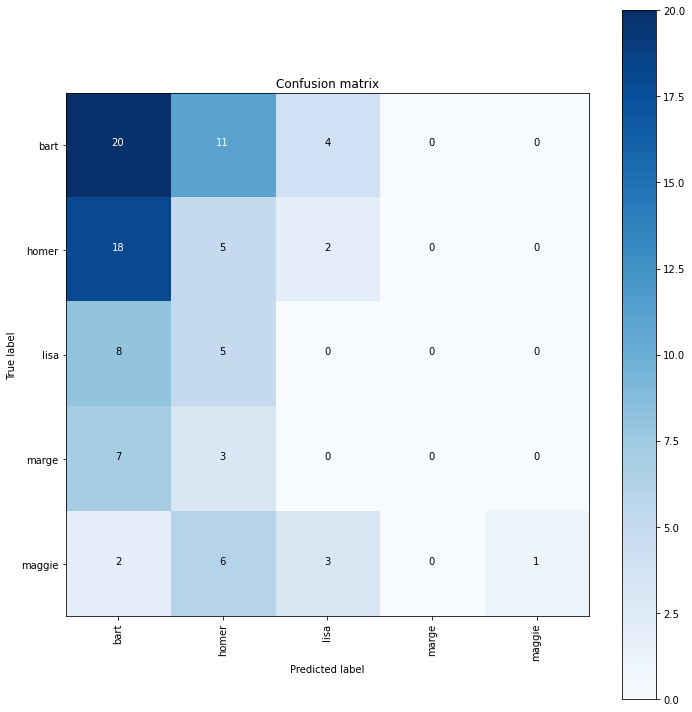

<Figure size 432x288 with 0 Axes>

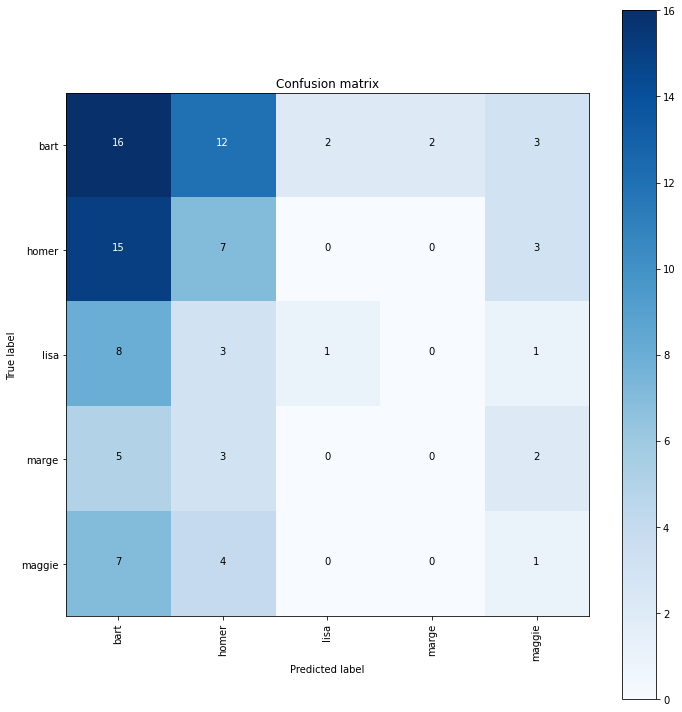

<Figure size 432x288 with 0 Axes>

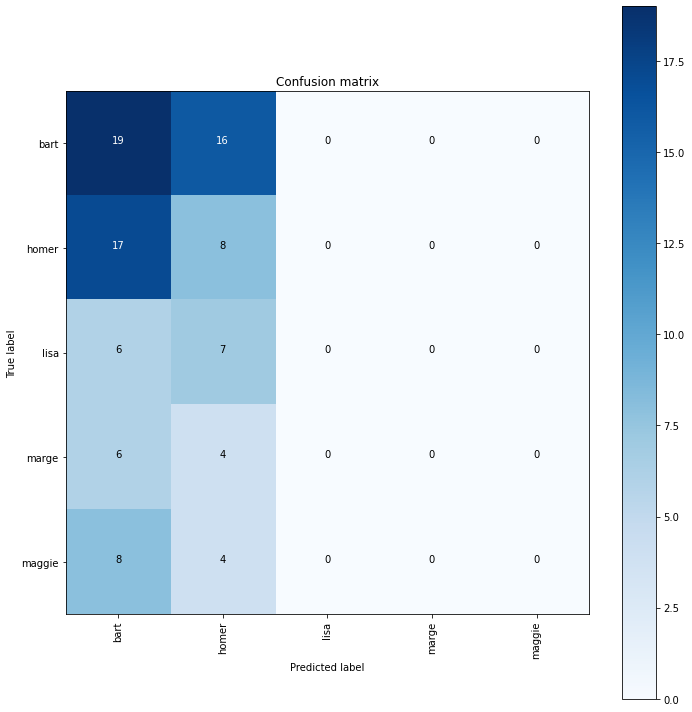

<Figure size 432x288 with 0 Axes>

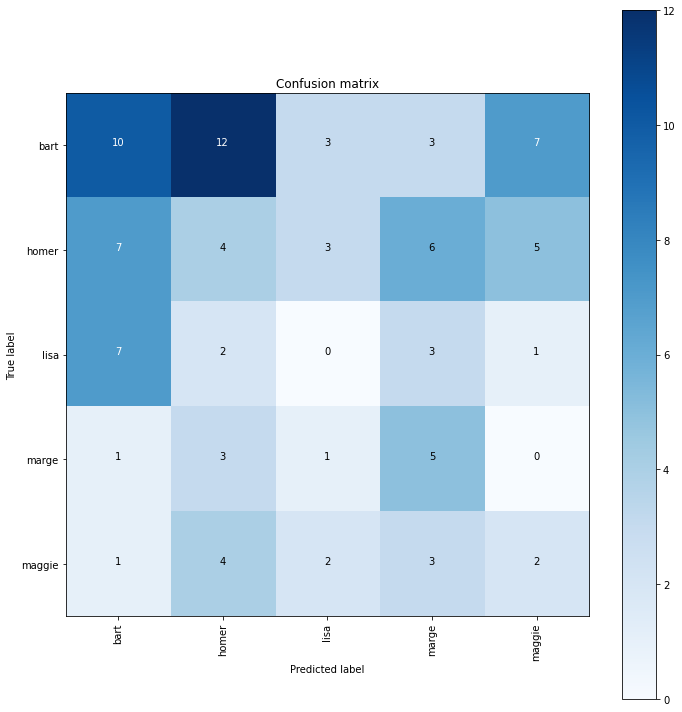

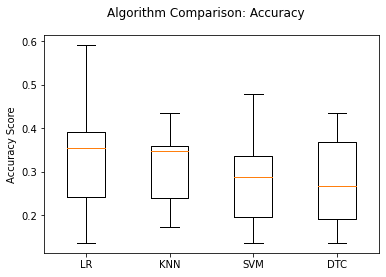

Processing Full GABOR
(226, 32768) (95, 32768)

Compare Multiple Classifiers:

Accuracy:

LR: 0.469170 (0.106958)
KNN: 0.424704 (0.051946)
SVM: 0.428854 (0.059565)
DTC: 0.372530 (0.094685)


<Figure size 432x288 with 0 Axes>

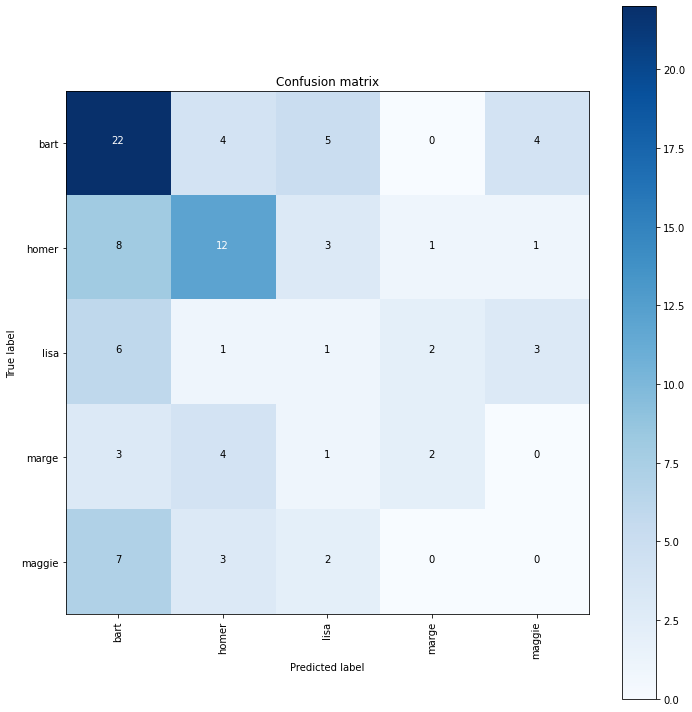

<Figure size 432x288 with 0 Axes>

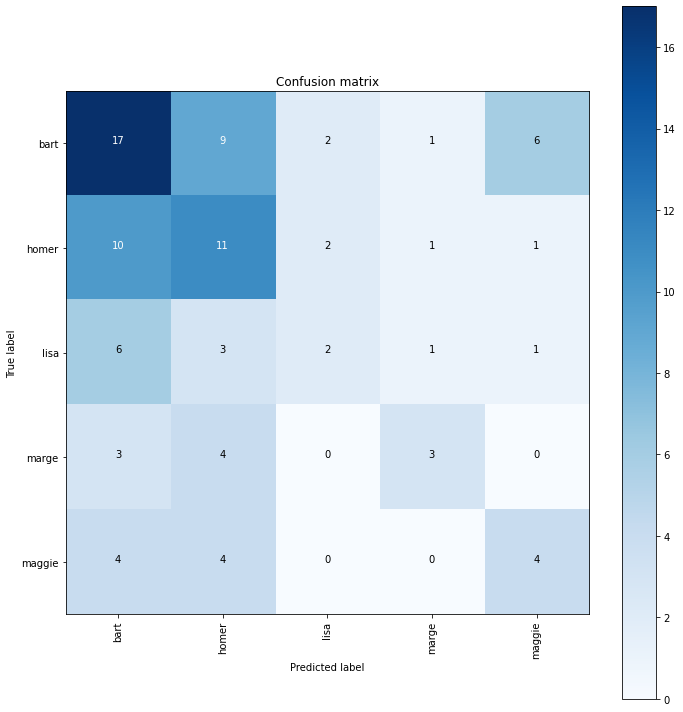

<Figure size 432x288 with 0 Axes>

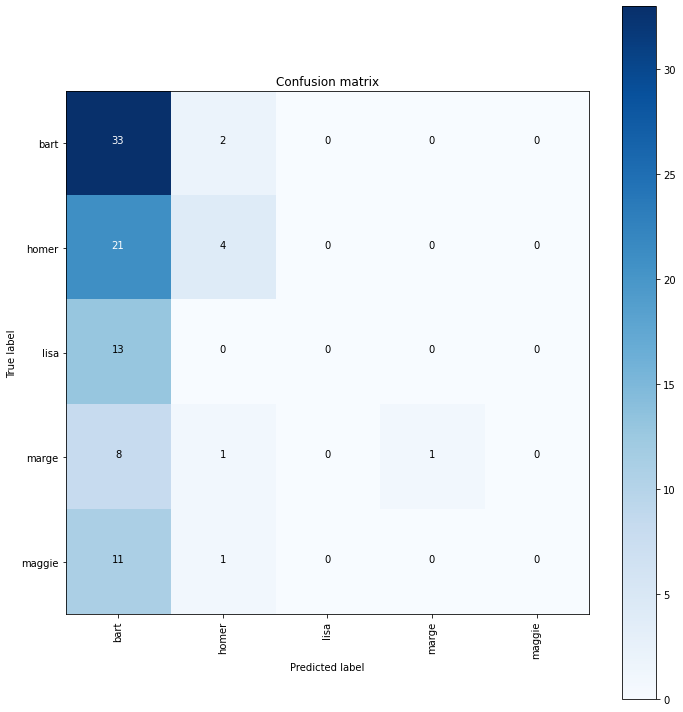

<Figure size 432x288 with 0 Axes>

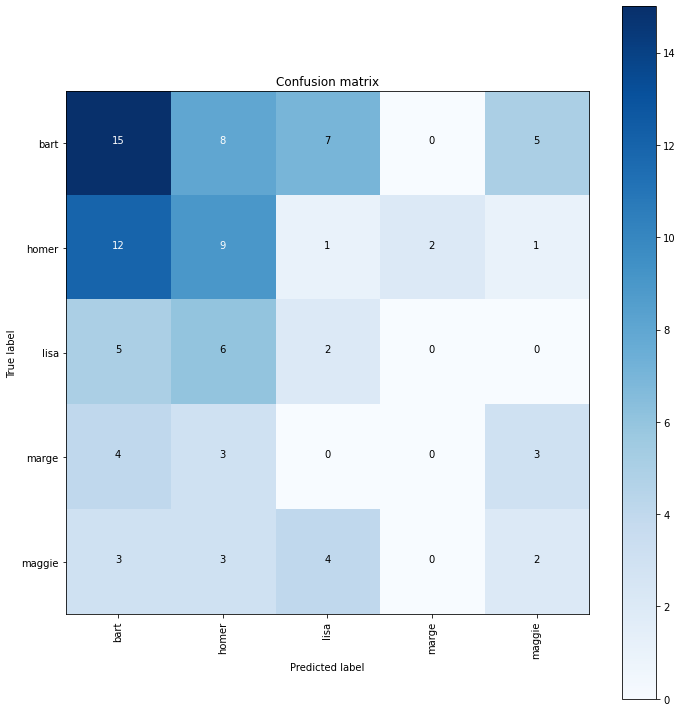

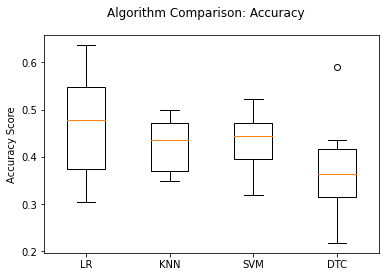

Processing Full LAB
(226, 98304) (95, 98304)

Compare Multiple Classifiers:

Accuracy:

LR: 0.593281 (0.093371)
KNN: 0.501383 (0.124838)
SVM: 0.548419 (0.077157)
DTC: 0.490909 (0.112006)


<Figure size 432x288 with 0 Axes>

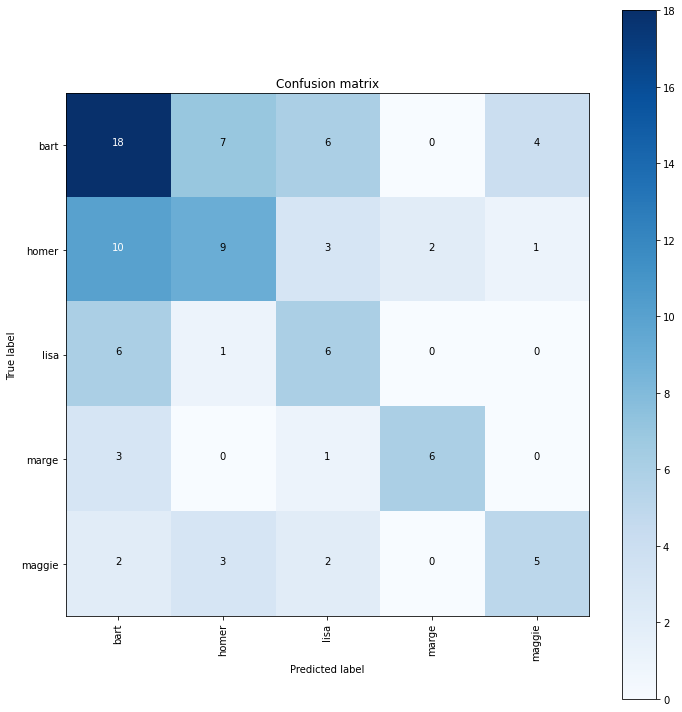

<Figure size 432x288 with 0 Axes>

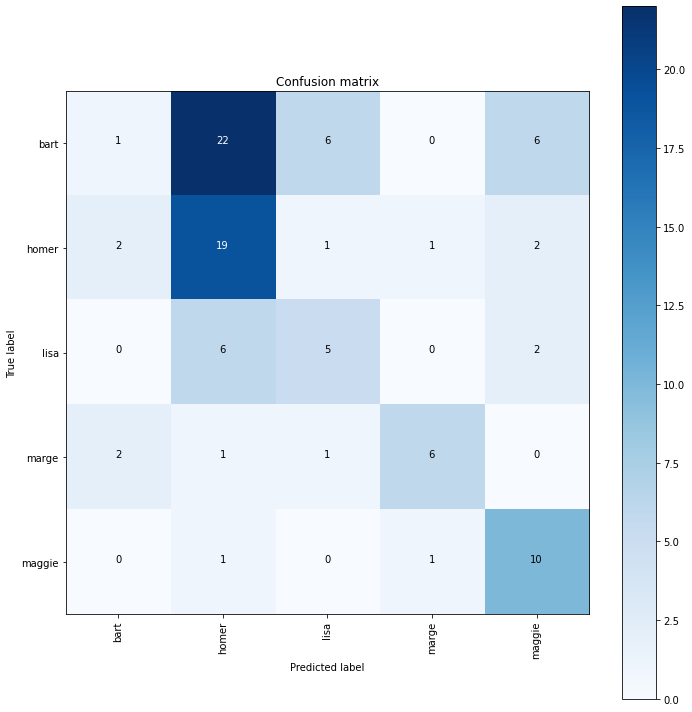

<Figure size 432x288 with 0 Axes>

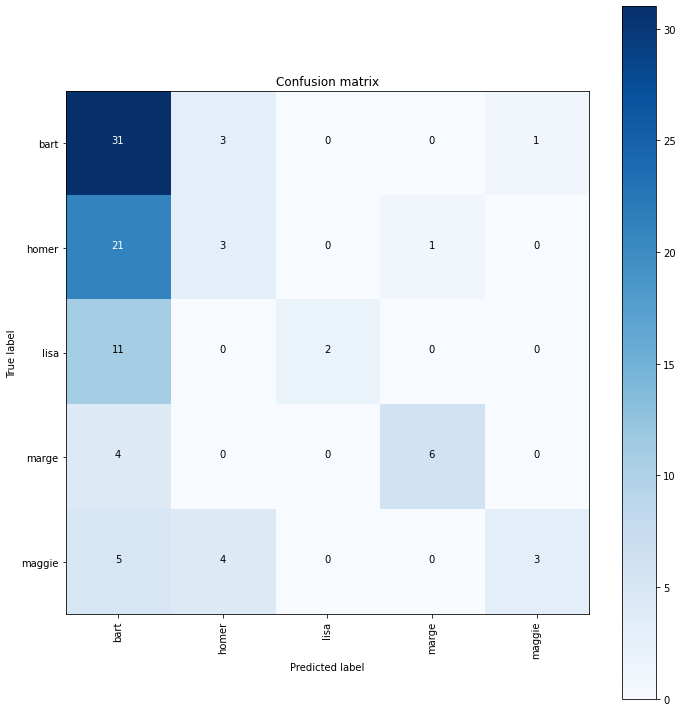

<Figure size 432x288 with 0 Axes>

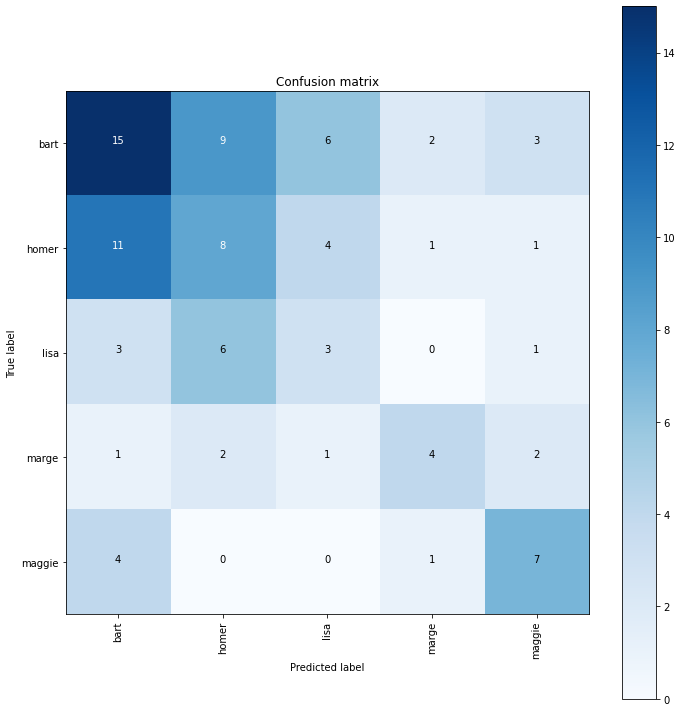

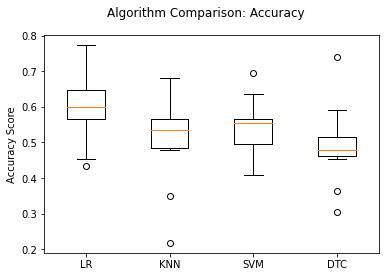


LR = LogisticRegression
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
DTC = DecisionTreeClassifier



In [ ]:
def compareABunchOfDifferentModelsAccuracy():

    for name_desc in desc_names:  
      train = features_train[name_desc]
      test = features_test[name_desc]
      
      print('Processing Full', name_desc )
      print(train.shape,test.shape)  
      

      print('\nCompare Multiple Classifiers:\n')
      print('Accuracy:\n')
      models = []
      models.append(('LR', LogisticRegression(max_iter=max_iter)))
      models.append(('KNN', KNeighborsClassifier(n_neighbors=K)))
      models.append(('SVM', SVC(max_iter=max_iter)))
      models.append(('DTC', DecisionTreeClassifier()))     
      resultsAccuracy = []
      names = []
      for name, model in models:
          model.fit(train, Y_train)
          kfold = model_selection.KFold(n_splits=10)
          accuracy_results = model_selection.cross_val_score(model, train, Y_train, cv=kfold, scoring='accuracy')
          resultsAccuracy.append(accuracy_results)
          names.append(name)
          accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
          print(accuracyMessage)  
          prediction = model.predict(test)
          cnf_matrix = confusion_matrix(Y_test, prediction)
          np.set_printoptions(precision=2)
          class_names = dict_characters 
          plt.figure()
          plot_confusion_matrix(cnf_matrix, classes=list(dict_characters.values()),title='Confusion matrix')
      # boxplot algorithm comparison
      fig = plt.figure()
      fig.suptitle('Algorithm Comparison: Accuracy')
      ax = fig.add_subplot(111)
      plt.boxplot(resultsAccuracy)
      ax.set_xticklabels(names)
      ax.set_ylabel('Accuracy Score')
      plt.show()
    return

compareABunchOfDifferentModelsAccuracy()

def defineModels():
    print('\nLR = LogisticRegression')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('DTC = DecisionTreeClassifier')
    print('')
defineModels()

A experimentação do tipo LAB ao invés do RGB, é devido a exatidão das cores que são apresentadas, as cores ficam uniformes.
Obtivemos resultados relativamente ruins com a maioria dos algoritmos para extração de características, o motivo principal seria a grande importância das cores nessas imagens, logo algoritmos de textura priorizando cores possuem melhores resultados.